# Step 1: Func $--$ 40 days vwap calculation (30 min interval)
### Question: where to find the amount traded in a interval 
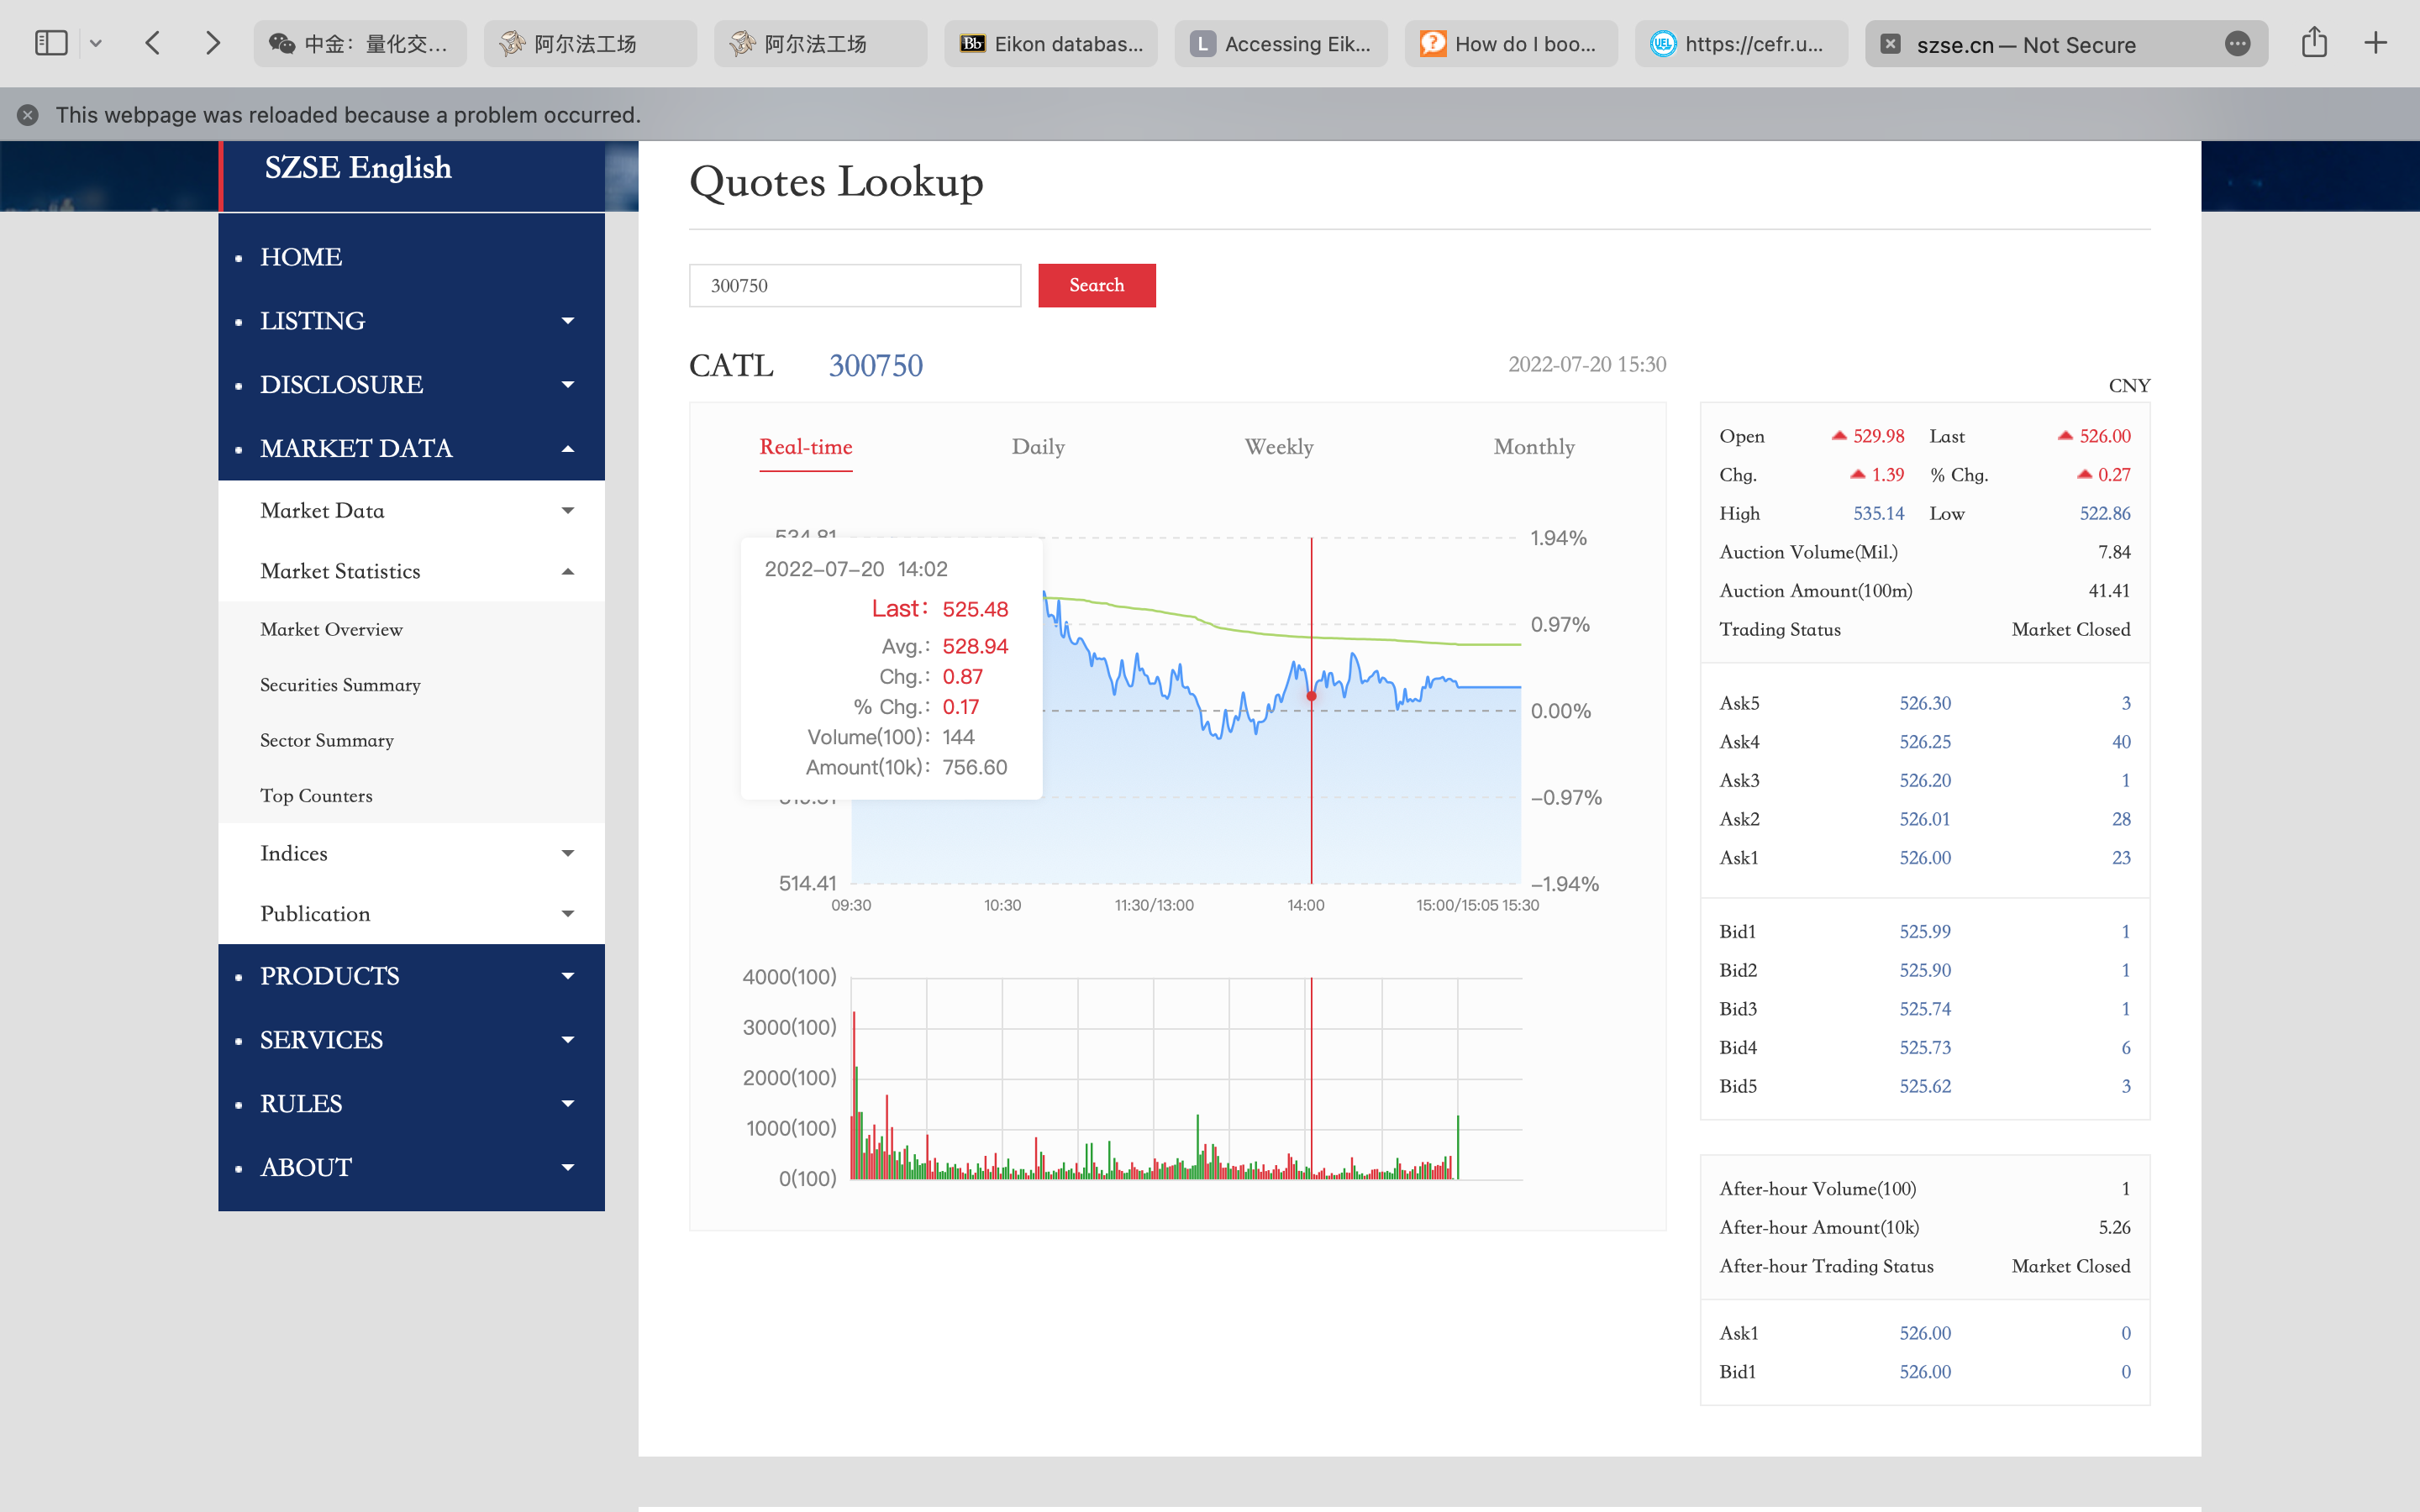


In [119]:
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2015/bin/x86_64-darwin'
print(os.getenv("PATH"))


/Users/jingyuqi/.pyenv/versions/2.7.18/bin:/usr/local/Cellar/pyenv/2.3.3/libexec:/usr/local/Cellar/pyenv/2.3.3/plugins/python-build/bin:/Users/jingyuqi/.pyenv/shims:/usr/local/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin:/usr/local/texlive/2015/bin/x86_64-darwin


In [120]:
# DATE: Apr 1 --- Jun 28
# 21 -- 60 day's vwap (40)
# 60*T intervals, prior 20*T intervals skipped, focus on 21st group of T intervals and later
# i.e. 40 groups of T intervals
import csv

# filePath = "./marketDataTable.csv"

# read table to get market data
def readData(filePath):
    marketDataTable = list()
    try:
        file = open(filePath, 'r')
        reader = csv.reader(file)
        for row in reader:
            marketDataTable.append(row)
    finally:
        file.close()
        
    return marketDataTable
            
T = 390   
def cal_vwap(marketDataTable):
    n = len(marketDataTable)       #T*60
    vwap = []   #1*40 vector
    p_t_list = []   # 40*390 matrix ideal, 40*390 len vector reality
    for j in range(0, 40):
        total_value = 0
        total_volume = 0 
        for i in range((20+j)*T+1, (21+j)*T+1):
            high_price = float(marketDataTable[i][4])
            low_price = float(marketDataTable[i][3])
            open_price = float(marketDataTable[i-1][2])
            close_price = float(marketDataTable[i][2])
            p_t = (high_price + low_price + open_price + close_price) / 4             #not able to find better substitute
            p_t_list.append(round(p_t, 8))
            volume = int(float(marketDataTable[i][5].replace(',','')))
            total_value += volume * p_t
            total_volume += volume
            
        single_vwap = total_value / total_volume
        vwap.append(round(single_vwap, 8))
    
    
    return vwap, p_t_list
    
    
    
 


# Step 2: Func $--$ 40 True and estimated(average) daily volume 

In [121]:
# total daily volume V estimation (20 day average) (40 length)
def est_dailyVolume(marketDataTable):

    T = 390
    # derive 60 daily volume list
    totalVolume_list = list()
    for i in range(1, 61):
        daily_volume = 0
        for j in range(1+(i-1)*T, 1+i*T):
            volume = int(float(marketDataTable[j][5].replace(',','')))
            daily_volume += volume
        totalVolume_list.append(daily_volume)

    # compute 40 test average volume list
    estVolume_list = list()
    
    for i in range(0, 40):
        estVolume = sum(totalVolume_list[i+0 : i+20]) / 20     # estimate as the average volume of prior 20 days
        estVolume_list.append(round(estVolume))
            
        
        
    return [totalVolume_list[20:], estVolume_list, totalVolume_list]







# Step 3: Func -- Mean of $\frac{m_t}{V}$

In [122]:
#
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np
import os
my_path = os.path.dirname(os.path.abspath("/Users/jingyuqi/Documents/Love and Thunder/GraphicsFolder/"))


T = 390
n = 37


def chunks(intervalVolume_list, T):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def cal_ratio_m(marketDataTable, totalVolume_list, n):
    
    T = 390
    intervalVolume_list = list()    # len = 60*T
    intervalChunk_list = list()    # len = 60
    
    # convert volume list to np array
    totalVolume_array = np.array(totalVolume_list)
    
    # extract interval volume list out, length = 60*T
    for i in range(1 , 60*T+1):
        index = int(float(marketDataTable[i][5].replace(',','')))
        intervalVolume_list.append(index)
    
    # get T length arrays out of intervalvolume list
    for i in range(0, len(intervalVolume_list), T):
        intervalChunk_list.append(intervalVolume_list[i:i + T])
    
    # divide the np interval matrix by total volume vector, 60 by 390 matrix
    intervalChunk_array = np.array(intervalChunk_list)
    ratio_array_60_by_390 =  intervalChunk_array / totalVolume_array[: , None]
    
    # compute ratio mean array dim = 40 by 390
    
    # compute the estimate averageRatio_array_40_by_390
    averageRatio_array_40_by_390 = np.zeros((40, T))
    for i in range(0, 40):    # row 
        for j in range(0, T):   # colume
            averageRatio_array_40_by_390[i, j] = sum(ratio_array_60_by_390[i:i+20, j]) / 20    # (average method) 21th day's estimated m_t_1 / V ratio
             
   











    # extract the first time interval of 40 estimates out 
    bs = range(21, 61)
    
    m_1_bar_list = averageRatio_array_40_by_390[:, 8]
    fig2, ax1 = plt.subplots(figsize = (15, 6))
    plot(bs, m_1_bar_list*100, 'bo-', label = 'Estimate')
    plot(bs, ratio_array_60_by_390[20: , 8]*100, 'ro-', label = "True")
    title('First time interval ratio $m_1/V$ of 40 estimates vs Real ratio')
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('% of Total Volume $m_1 / V$')
    
    # ylim([5, 31])
    legend(loc='upper right')
    
    # Thinking: ***how to obtain the standard deviation(MSE) of our estimate from real data
    # ***or the expectation of SD
    
    
    # plot 21th day's average estimated m_t / V
    fig3, ax3 = plt.subplots(figsize = (40, 20))
    
    
    major_ticks = np.arange(0, 391, 30)
    minor_ticks = np.arange(0, 391, 15)
    major_ticks_2 = np.arange(0, 3.5, 0.5)
    minor_ticks_2 = np.arange(0, 3.25, 0.25)
    
    idx = pd.date_range(start = "5/23/2022 09:30", end = "5/23/2022 16:00", freq="0.5H")
    idx.to_pydatetime()
    
    labels = range(0, 14)
    ax3.set_xticks(major_ticks, idx, fontsize=30)
    ax3.set_xticks(minor_ticks, minor = True)
    ax3.set_yticks(major_ticks_2, major_ticks_2, fontsize=30)
    ax3.set_yticks(minor_ticks_2, minor = True)
    
    ax3.grid(which='both')
    ax3.grid(which='major', linestyle='--')
    ax3.grid(which='minor', linestyle='')
    
    ylim([0, 3.1])
    xlim([0, 391])
    
    ax3.set_xlabel('Time', fontsize=36)
    ax3.set_ylabel('% of Total Volume $m_t / V$', fontsize=36)
    # title("$n$th day's average estimated $m_t / V$ vs Real ratio", fontsize=40)
    
    # initial comparison indices: 0upper, 20lower
    x_list = list(np.arange(0.5, 390.5, 1))
    plot(x_list, averageRatio_array_40_by_390[n, :]*100, 'b', label = "21th day estimate", linewidth=3.5)
    plot(x_list, ratio_array_60_by_390[n+20,:]*100, 'r', label ="21th day real ratio", linewidth=3)
    
    legend(loc='upper left', fontsize=36)
    
    gcf().autofmt_xdate()
    
    # plot accumulated volume percentage(against separate dot plot above) comparison between true data and estimator
    
    # obtain the estimated accumulated POV plot vector(unit %) 
    # use np in-built formula to get the results directly without bothering
    est_acc_volume_list = np.cumsum(averageRatio_array_40_by_390, axis=1)    # 40 by 390
    true_acc_volume_list = np.cumsum(ratio_array_60_by_390, axis=1)    # 60 by 390
    
    plt.savefig(my_path + "/GraphicsFolder/21th day's estimated $POV$ vs Real market POV.pdf", dpi=300)
    
    # plot the accumulated comparison between estimate and true data
    fig4, ax4 = plt.subplots(figsize = (40, 20))
    
    
    major_ticks = np.arange(0, 391, 30)
    minor_ticks = np.arange(0, 391, 15)
    major_ticks_2 = np.arange(0, 110, 10)
    minor_ticks_2 = np.arange(0, 105, 5)
    
    idx = pd.date_range(start = "5/23/2022 09:30", end = "5/23/2022 16:00", freq="0.5H")
    idx.to_pydatetime()
    
    labels = range(0, 14)
    ax4.set_xticks(major_ticks, idx, fontsize=30)
    ax4.set_xticks(minor_ticks, minor = True)
    ax4.set_yticks(major_ticks_2, major_ticks_2, fontsize=30)
    ax4.set_yticks(minor_ticks_2, minor = True)
    
    ax4.grid(which='both')
    ax4.grid(which='major', linestyle='--')
    ax4.grid(which='minor', linestyle='')
    
    ylim([0, 101])
    xlim([0, 391])
    
    ax4.set_xlabel('Time', fontsize=36)
    ax4.set_ylabel('% cum. percentage of total volume', fontsize=36)
    # title("$n$th day's accumulated estimated $POV$ vs Real market POV", fontsize=40)
    
    # initial comparison indices: 0upper, 20lower
    x_list = list(np.arange(0.5, 390.5, 1))
    plot(x_list, est_acc_volume_list[n, :]*100, 'b--', label = "10th day estimate", linewidth=5.5)
    plot(x_list, true_acc_volume_list[n+20,:]*100, 'r-', label ="10th day real ratio", linewidth=5)
    
    
    legend(loc='upper left', fontsize=36)

    gcf().autofmt_xdate()
    
    plt.savefig(my_path + "/GraphicsFolder/10th day's accumulated estimated $POV$ vs Real market POV.pdf", dpi=300)
            
             
    #compare adjancent two days' m_t / V ratio to check correlation hypothesis
    fig6, ax6 = plt.subplots(figsize = (50, 20))
    
    
    major_ticks = np.arange(0, 391, 30)
    minor_ticks = np.arange(0, 391, 15)
    major_ticks_2 = np.arange(0, 3.5, 0.5)
    minor_ticks_2 = np.arange(0, 3.25, 0.25)
    
    idx = pd.date_range(start = "09:30", end = "16:00", freq="0.5H")
    idx.to_pydatetime()
    
    labels = range(0, 14)
    ax6.set_xticks(major_ticks, idx, fontsize=20)
    ax6.set_xticks(minor_ticks, minor = True)
    ax6.set_yticks(major_ticks_2, major_ticks_2, fontsize=20)
    ax6.set_yticks(minor_ticks_2, minor = True)
    
    ax6.grid(which='both')
    ax6.grid(which='major', linestyle='--')
    ax6.grid(which='minor', linestyle='')
    
    ylim([0, 3.1])
    xlim([0, 391])
    
    ax6.set_xlabel('Time', fontsize=36)
    ax6.set_ylabel('% of Total Volume $m_t / V$', fontsize=36)
    title("two adjancent day real ratio comparison", fontsize=40)
    
    # initial comparison indices: 0upper, 20lower
    x_list = list(np.arange(0.5, 390.5, 1))
    plot(x_list, ratio_array_60_by_390[n+20,:]*100, 'b', label = "20th day estimate", linewidth=3)
    plot(x_list, ratio_array_60_by_390[n+21,:]*100, 'r', label ="21th day real ratio", linewidth=2.5)
    
    legend(loc='upper left', fontsize=36)
    
    gcf().autofmt_xdate()
    
    # compare accumulated percentage between two adjacent days
    fig7, ax7 = plt.subplots(figsize = (50, 20))
    
    
    major_ticks = np.arange(0, 391, 30)
    minor_ticks = np.arange(0, 391, 15)
    major_ticks_2 = np.arange(0, 110, 10)
    minor_ticks_2 = np.arange(0, 105, 5)
    
    idx = pd.date_range(start = "09:30", end = "16:00", freq="0.5H")
    idx.to_pydatetime()
    
    labels = range(0, 14)
    ax7.set_xticks(major_ticks, idx, fontsize=30)
    ax7.set_xticks(minor_ticks, minor = True)
    ax7.set_yticks(major_ticks_2, major_ticks_2, fontsize=30)
    ax7.set_yticks(minor_ticks_2, minor = True)
    
    ax7.grid(which='both')
    ax7.grid(which='major', linestyle='--')
    ax7.grid(which='minor', linestyle='')
    
    ylim([0, 101])
    xlim([0, 391])
    
    ax7.set_xlabel('Time', fontsize=36)
    ax7.set_ylabel('% cum. percentage of total volume', fontsize=36)
    title("two day comparison", fontsize=40)
    
    # initial comparison indices: 0upper, 20lower
    x_list = list(np.arange(0.5, 390.5, 1))
    plot(x_list, true_acc_volume_list[n+20, :]*100, 'b--', label = "20th real ration", linewidth=3)
    plot(x_list, true_acc_volume_list[n+21, :]*100, 'k-', label ="21th day real ratio", linewidth=2.5)
    plot(x_list, est_acc_volume_list[n+1, :]*100, 'r-', label ="21th day estimate ratio", linewidth=2.5)
    
    
    
    legend(loc='upper left', fontsize=36)

    gcf().autofmt_xdate()
    
        
    # calculate the mean of MAE of m_t / V spanning 40 days
    MAE_list = []
    for i in range(0, 39):    # for each day
        
        estimate = averageRatio_array_40_by_390[i, :]*100
        actual = ratio_array_60_by_390[i+20, :]*100
        
        diff = estimate - actual
        abs_diff = np.absolute(diff)
        MAE = sum(abs_diff)/len(abs_diff)
        MAE_list.append(MAE)
        
        
    print("MAE list: ", np.around(np.array(MAE_list), 3))
    mean_MAE = sum(MAE_list) / len(MAE_list)     # outcomes in percentage (%)
    SD_MAE = sqrt(sum((MAE_list - mean_MAE)**2) / len(MAE_list))
    print("mean_MAE, SD_MAE: ", [round(mean_MAE ,3), round(SD_MAE, 3)])
    # compute error rate of this estimate which is MAE normalized by min ratio mean
    volume_Error_rate = mean_MAE / ((1/390)*100)
    print("Error_rate:", volume_Error_rate)    
    
    # calculate slippage (transaction cost per share)
    
    # first calculate u_t matrix
    C = 700000     # daily trading total volume
    u_t_array = C * averageRatio_array_40_by_390 
    
    # second calculate p_hat_t matrix
    s_t = 0.0002       # fractional bid-ask spread
    alpha = 90
    # vector to matrix for p_t
    p_t_list = cal_vwap(marketDataTable)[1]
    p_t_matrix = []
    for i in range(0, len(p_t_list), T):
        p_t_matrix.append(p_t_list[i:i + T])
    # convert to np array
    p_t_array = np.array(p_t_matrix)   # 40 by 390
    intervalChunk_array_40_by_390 = intervalChunk_array[20: , : ]      
    # u_t_array    40 by 390
    f = lambda x, y, z: x * (1 - s_t/2 + alpha * (s_t/2) * (y/z) )
    p_hat_t_array = f(p_t_array, u_t_array, intervalChunk_array_40_by_390)
    
    # apply the formula for slippage
    slippage_list = []
    vwap = cal_vwap(marketDataTable)[0]
    for i in range(0, 40):
        u_t = u_t_array[i, :]
        p_hat_t = p_hat_t_array[i, :]
        first_term = np.sum(u_t * p_hat_t)
        second_term = C * vwap[i]
        result = (first_term - second_term) / second_term
        slippage_list.append(result)
    
    slippage_array = np.array(slippage_list)*100
    slippage_array = np.around(slippage_array, 3)
    np.set_printoptions(suppress=True)
    # used for total transaction cost calculation
    # slippage_list = np.around(np.array(slippage_list), 6) * C
    
    
    # visualize transaction cost for each day
    bs = range(21, 61)
    fig6, ax6 = plt.subplots(figsize = (15, 6))
    # formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
    # ax1.yaxis.set_major_formatter(formatter1)
    ax6.set_xlabel('Days($21 -- 60$)')
    ax6.set_ylabel('Relative Slippage(%)')
    
    major_ticks = np.arange(20, 61, 3)
    ax6.set_xticks(major_ticks, fontsize=5)
    ax6.grid(linestyle='--')
    
    plt.axhline(y=0, color = 'k', linewidth=3 )
    
    
    plot(bs, slippage_array, 'ro-')
    title('Slippage list')
    
    # sum(slippage) / len(slippage)
    mean_slippage = sum(slippage_array) / len(slippage_array)     # outcomes in percentage (%)
    SD_slippage = sqrt(sum((slippage_array - mean_slippage)**2) / len(slippage_array))
    print("mean_slippage, SD_slippage: ", [round(mean_slippage ,3), round(SD_slippage, 3)])
    # compute 
    
  
    return slippage_array # averageRatio_array_40_by_13
    
    

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [123]:
import numpy as np 

x = np.array([[0, 1, 2], [3, 4, 5]])
y = np.array([[1, 2, 3], [4, 5, 6]])
print(np.sum(x*y))


# f = lambda x, y: 2*x - y
# diff = f(x, y)
# print(shape(x))

70


# Thoughts: 
*At the moment, I have two models*, one is to use historical data (past 20 days) to
derive an estimated m_t market model (joint prob) , and by observing m_1, m_2, ... , m_t-1 (current day's volume)
we get comditional marginal prob for the volume in coming time intervals. 
In this model, we don't consider liquidation problem, we solely trade 1% of total volume and wish it will not have any 
impact. Therefore, in order for our target volume to be fully achieved we assume that the fraction of 
market orders (u_MO / u_t) over the trading interval is proportional to the participation rate (u_t / m_t). 

*For The second model*, we observe the volume traded over the last several seconds or minutes, and then trade a
percentage of this volume over the next several seconds or minutes. This can interpreted as targeting a fraction
of the rate of trading at every instant in time to ensure that the investor is tracking the average price. Ideally, the 
investor will trade n% of market volume in the end and get the average cost which is very close to VWAP. 
In this model, since we have solved the volume prediction problem, we are only concerned with 
liquidation problem in which we examine how to derive the optimal trading rate along the time to
achieve full liquidation. As a result, we do not care about historical data in this model. 

### what is the use of neuralscience in the targeting-volume model?

### what project should I ask for my supervisor? Is Dynamic Bayes Network a good idea?



# Step 4: Finally, Slippage
#### We restrict our analysis to "buy" order in context.
## 1. Definition
Let's start by looking at the principles behind these funcstions. Why would I estimate the value $\frac{m_t}{V}$ anyway? 
All these start with "slippage" which is defined as the amount by which the order execution price misses the benchmark (in this case our benchmark is $p_{vwap}$).\
The trading industry usually defines the *slippage* as $$\sum_{t=1}^T u_t \hat{p_t} - C p_{vwap} $$
- $u_t$ as the traded volume of the order in *time interval $t$*
- $\hat{p_t}$ as the *effective* price defined so that the whole cost of the trade at interval t is $u_t \hat{p_t}$ ( $\hat{p_t}$ represents *transaction costs* and *market impact*)
- $C$ as target volume
- $p_{vwap}$ as benchmark price which is computed as $\frac{\sum_{t=1}^T m_t p_t}{V}$  
1. $p_t$ as the average price in *time interval $t$  
(*there are still disputes regarding the derivation of $p_t$ which is preferably interpreted as interval vwap, however since I couldn't find total amount traded over a certain time interval from Internet, I had to take the average of high and low prices as p_t instead.*)  
2. $m_t$ as the total traded volume in *time interval $t$*  
3. $V$ as the total traded volume in that day

We instead define slippage as 
$$
S = \frac{\sum_{t=1}^T u_t \hat{p_t} - C p_{vwap}}{C p_{vwap}}
$$
normalizing by the value of the order.  
  
We know in reality the broker trades the volume $u_t$ using an algorithm which mixes market and limit orders. Here we introduce $s_t \in \mathbb{R}_{++}$ to be the average fractional (as ratio of the stock price) bid-ask spread in period $t$. Therefore, the cost per share of a buy market order is on average $p_t(1+\frac{s_t}{2})$ while for a limit buy order it is on average $p_t(1-\frac{s_t}{2})$.  
[**Assumption 1**]We assume that the fraction of market orders over the traded volume is proportional to the *participation rate*, defined as $u_t/m_t$. So  
  
$$
\frac{u_{MO}}{u_t} = \frac{\alpha}{2}\frac{u_t}{m_t}
$$  
\*This is a reasonable assumption since the stock APPLE we examines is highly liquid hence has extremely small participation rate.  
[**Assumption 2** & 3]Here we choose $\alpha$ as 90 following the assumption that \[1\] the fractional spread $s_t$ is constant in time and equal to 2 basis points $(0.0002)$, i.e. $s_1 = \dots = s_T = 2 b.p$ which is introduced for efficiency purposes in calculation later. \[2\] Trading one day's volume costs approx one day's volatility. We estimate empirically over the first 20 days of AAPL of our sample the open-to-close volatility, equal to 90 points.  
The whole cost of the trade therefore is 
$$ 
u_t \hat{p_t} = p_t \left(u_{LO}(1-\frac{s_t}{2})+u_{MO}(1+\frac{s_t}{2})\right)
$$
which implies
$$ 
\hat{p_t} = p_t \left(1-\frac{s_t}{2}+\alpha\frac{s_t}{2}\frac{u_t}{m_t}\right)
$$
We thus have a simple model for the effective price $\hat{p_t}$, linear in $u_t$. This gives rise to a ***quadratic transaction costs***, a reasonable approximation consistent with the trading industry.
By subsitituting the $\hat{p_t}$ defined above into slippage we get the expression for S. (where we had two approximations, both first order)
Therefore, our **objective function** is to minimize the mean-variance of S
$$
\mathbf{E}S+\lambda\mathbf{var}(S)
$$

for a given risk-aversion parameter $\lambda \ge 0$
We thus get
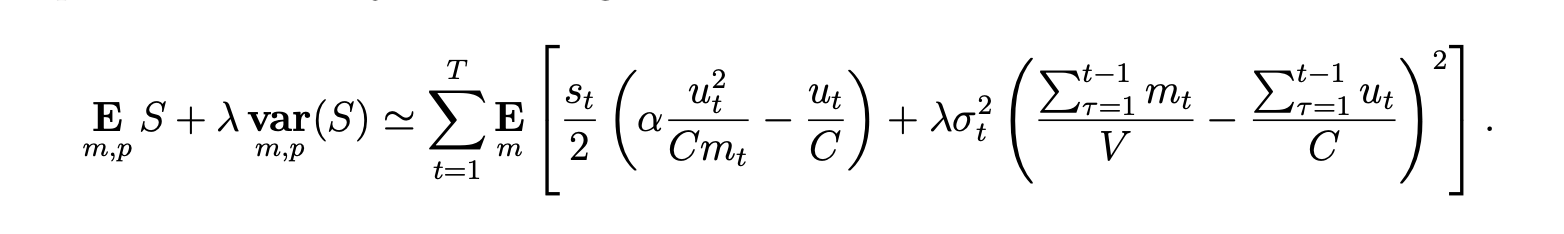


## 2. Solution
We start to solve the optimization problem with objective function and two constraints
\begin{align*}
minimize & \;\;\;\mathbf{E}_{m,p}S+\lambda\mathbf{var}_{m,p}(S) \\
s.t.\; & \;\;\;\sum_{t=1}^{T}u_t = C \\
& \;\;\;u_t \ge 0, \;t= 1, \dots, T
\end{align*}
We write the problem in the equivalent form
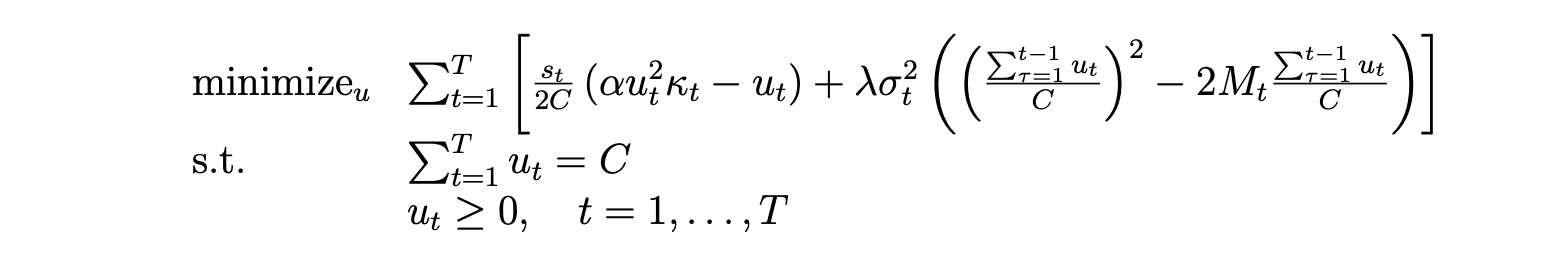
where $M_t$ and $k_t$ are the constants,
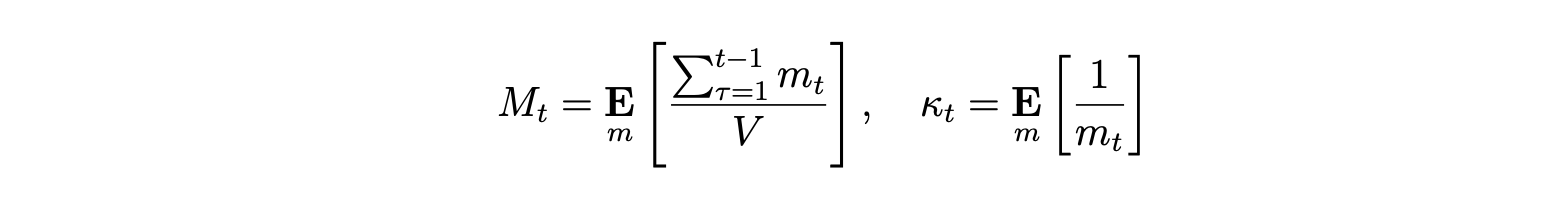
In this form, the problem is a standard quadratic program which can be solved by open-source solvers using a symbolic convex optimization suite.
  
[**Assumption 2**]Here we consider the special case of constant spread, $s_1 = \dots = s_T $, which leads to a great simplification of the solution. The convex problem has the form 
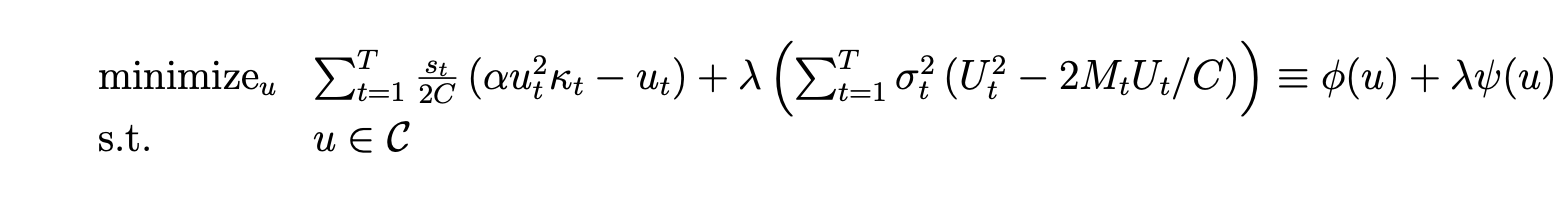
We sparate the problem into two subproblems considering each of the two terms of the objective.  
The first one is 
\begin{align*}
minimize & \;\;\;\phi(u) \\
s.t.\; & \;\;\;u \in \mathbf{C}
\end{align*}
which is equivalent to 
\begin{align*}
minimize & \;\;\;\sum_{t=1}^{T}u_t^2k_t \\
s.t.\; & \;\;\;u \in \mathbf{C}
\end{align*}
The optimal solution by Lagrange duality is 
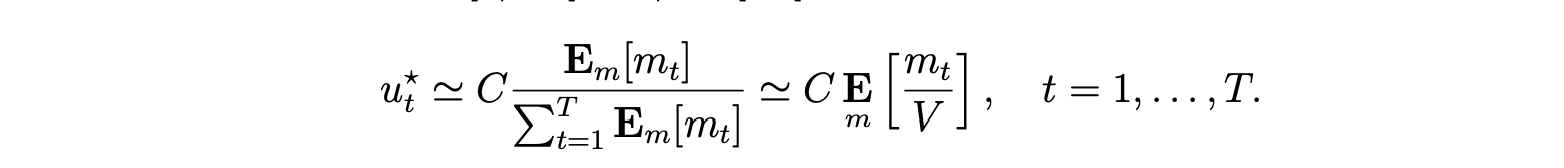
The second problem is 
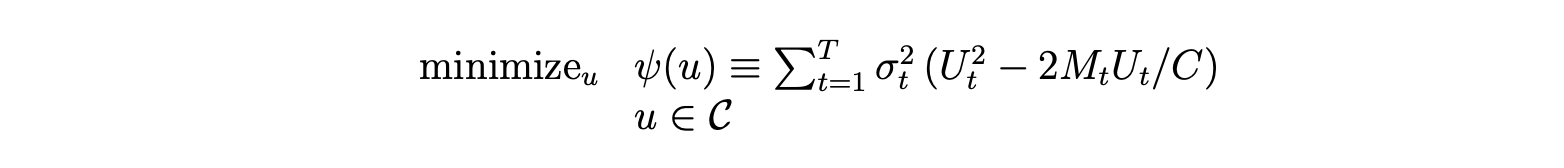
we choose the $U_t,\;U_t=\sum_{r=1}^{t-1}u_t/C\;$  such that  $\;\sigma^2(U_t-M_T)=0$ so $U_t = M_t$. The values of $u_1, u_2, \dots, u_{t-1}$ are thus fixed and these $u_t$ values are feasible. It turns out that this $U_t$ is an optimal solution, it has values 
$$
u_t^* = C\,\mathbf{E}_m \left[\frac{m_t}{V}\right]
$$
Now consider the original problem. The objective function is a convex combination of two convex problems above and all three have the same constraints set. Since the two subproblems share an optimal solution $u^*$, it follows that u^* is also an optimal solution for the combined problem.  Thus, an optimal solution of objective function in the case of constant spread is 
$$
u_t^* = C\,\mathbf{E}_m \left[\frac{m_t}{V}\right]
\;\;\;t\,=\,1,\dots,T
$$
This is standard in the brokerage industry. In our model this solution arises as the special case of constant spread, in general we could derive more sophisticated solutions. However, with respect to minimization of the variance of S, this solution is indeed optimal.

# 3. Empirical results
We study the performance of optimal solution $u^*$ in section 2, using AAPL market and volume data.  
We simulate execution on $N\,=\,60$ market days from Apr 1 2022 to Jun 23. We process data to obtain daily series of market volumes $m_t$ and average period price $p_t$ for $t=1,\dots,T$ where $T =13$, so that each interval is 30-minute long.  
We organize our simulations according to a "rolling testing" procedure: for every day used to simulate execution with an order of volume C. We estimate the various parameters on data from a window covering the preceding $W=20$ days. We thus derive a 40 by 13 matrix with each row storing the estimate $m_t/V$ ratio from 21th day to 60th and each column storing the estimate ratio of $m_t/V$ ratio for a particular time interval, $t=1,\dots,T$.  
We fix the size of the order C = 0.7m equal to $1%$ of the expected daily volume for AAPL which is approx 7m (See Step 2 for the specified daily volume V estimation). 
  
*Such orders are small enough to have negilible impact on the price of stock, as we need the price and volume to stay unchanged after execution.   
\*Interesting question: here is another assumption that seems unharmful but indeed huge in terms of modelling itself which reveals one of the biggest shortfalls of backtesting that is the backtesting is dead, while market is alive, which forces the biggest assumption that our orders do not affect the market at all. From anohter perspective, it's also a big constraint posed on our model that we can't even test order size to be larger than $1%$ of total volume of a day($\le0.7m$), which leads to the inability to test many meaningful trading scenarios.*  
*This also triggers me to think about the usage of interactive multi-agent simulator under this circumstances of market impact caused by large orders. It seems to be able to solve this problem perfectly with the premise that it models market interaction and price-volume in a correct manner as the interactive simulator respond to new orders based on the size of them. *  

We use the 20-day sample average to calculate the expected of ratio $m_t/V$ which is 
$$
\mathbf{E}\left[\frac{m_{t}}{V}\right] \approx \frac{\sum_{r=i}^{i+W}m_{t, i}/V_{i}}{W}
$$

In essence, $p_t$ is a linear function of $u_t$, which means $p_t$ depends on $u_t$, and the transaction cost contained in slippge is just a quadractic program(essentially a quadratic equation) of $u_t$. If we choose $u_t$ to be perfectly equal to the real $C*m_t/v$ value, assume that we can trade at a price $\hat{p_t}$ better than $p_t$ by utilizing the bid-ask spread $s_t$, we can actually beat the VWAP in the end, so the problem ends up going to be how to best estimate the value of $m_t/v$ (POV) in a time interval. In this sense we can understand that the finer we divide our time interval into the better our result will be. 




























In [124]:
# used for installation
import sys
!{sys.executable} -m pip install numpy





[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.5/libexec/bin/python3.10 -m pip install --upgrade pip


# Execution cell

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Reading market data
MAE list:  [0.069 0.081 0.107 0.076 0.071 0.072 0.071 0.099 0.078 0.067 0.067 0.074
 0.083 0.082 0.083 0.076 0.069 0.073 0.074 0.081 0.076 0.076 0.08  0.072
 0.077 0.076 0.074 0.075 0.072 0.074 0.062 0.107 0.072 0.097 0.077 0.086
 0.074 0.091 0.063]
mean_MAE, SD_MAE:  [0.078, 0.01]
Error_rate: 0.3033882351632786
mean_slippage, SD_slippage:  [0.913, 5.683]
***relative slippage list length: 40 unit: %  [  0.043  -0.029  -0.269   0.261  -0.088  -0.041  -0.024   0.489   0.041
   0.028  -0.015  -0.013   0.28   -0.014   0.199   0.073  -0.034  -0.005
   0.072   0.04   -0.02   -0.076   0.08   -0.04    0.036   0.051  -0.029
   0.137  -0.016   0.041   2.832   7.796  15.206  11.632  13.205 -24.374
   4.347   9.167  -4.241  -0.207]


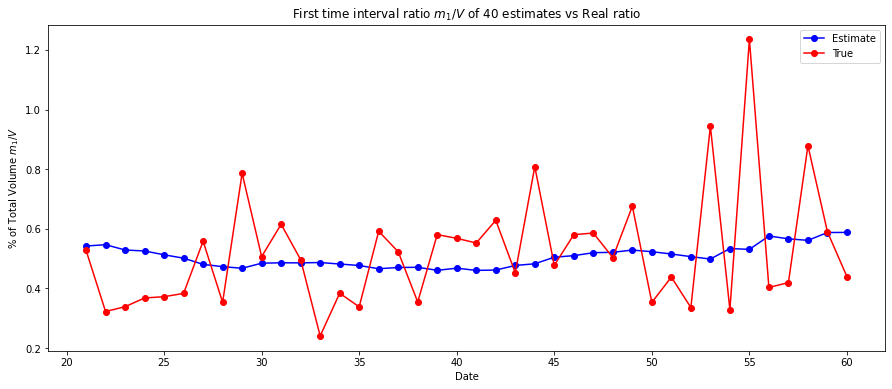

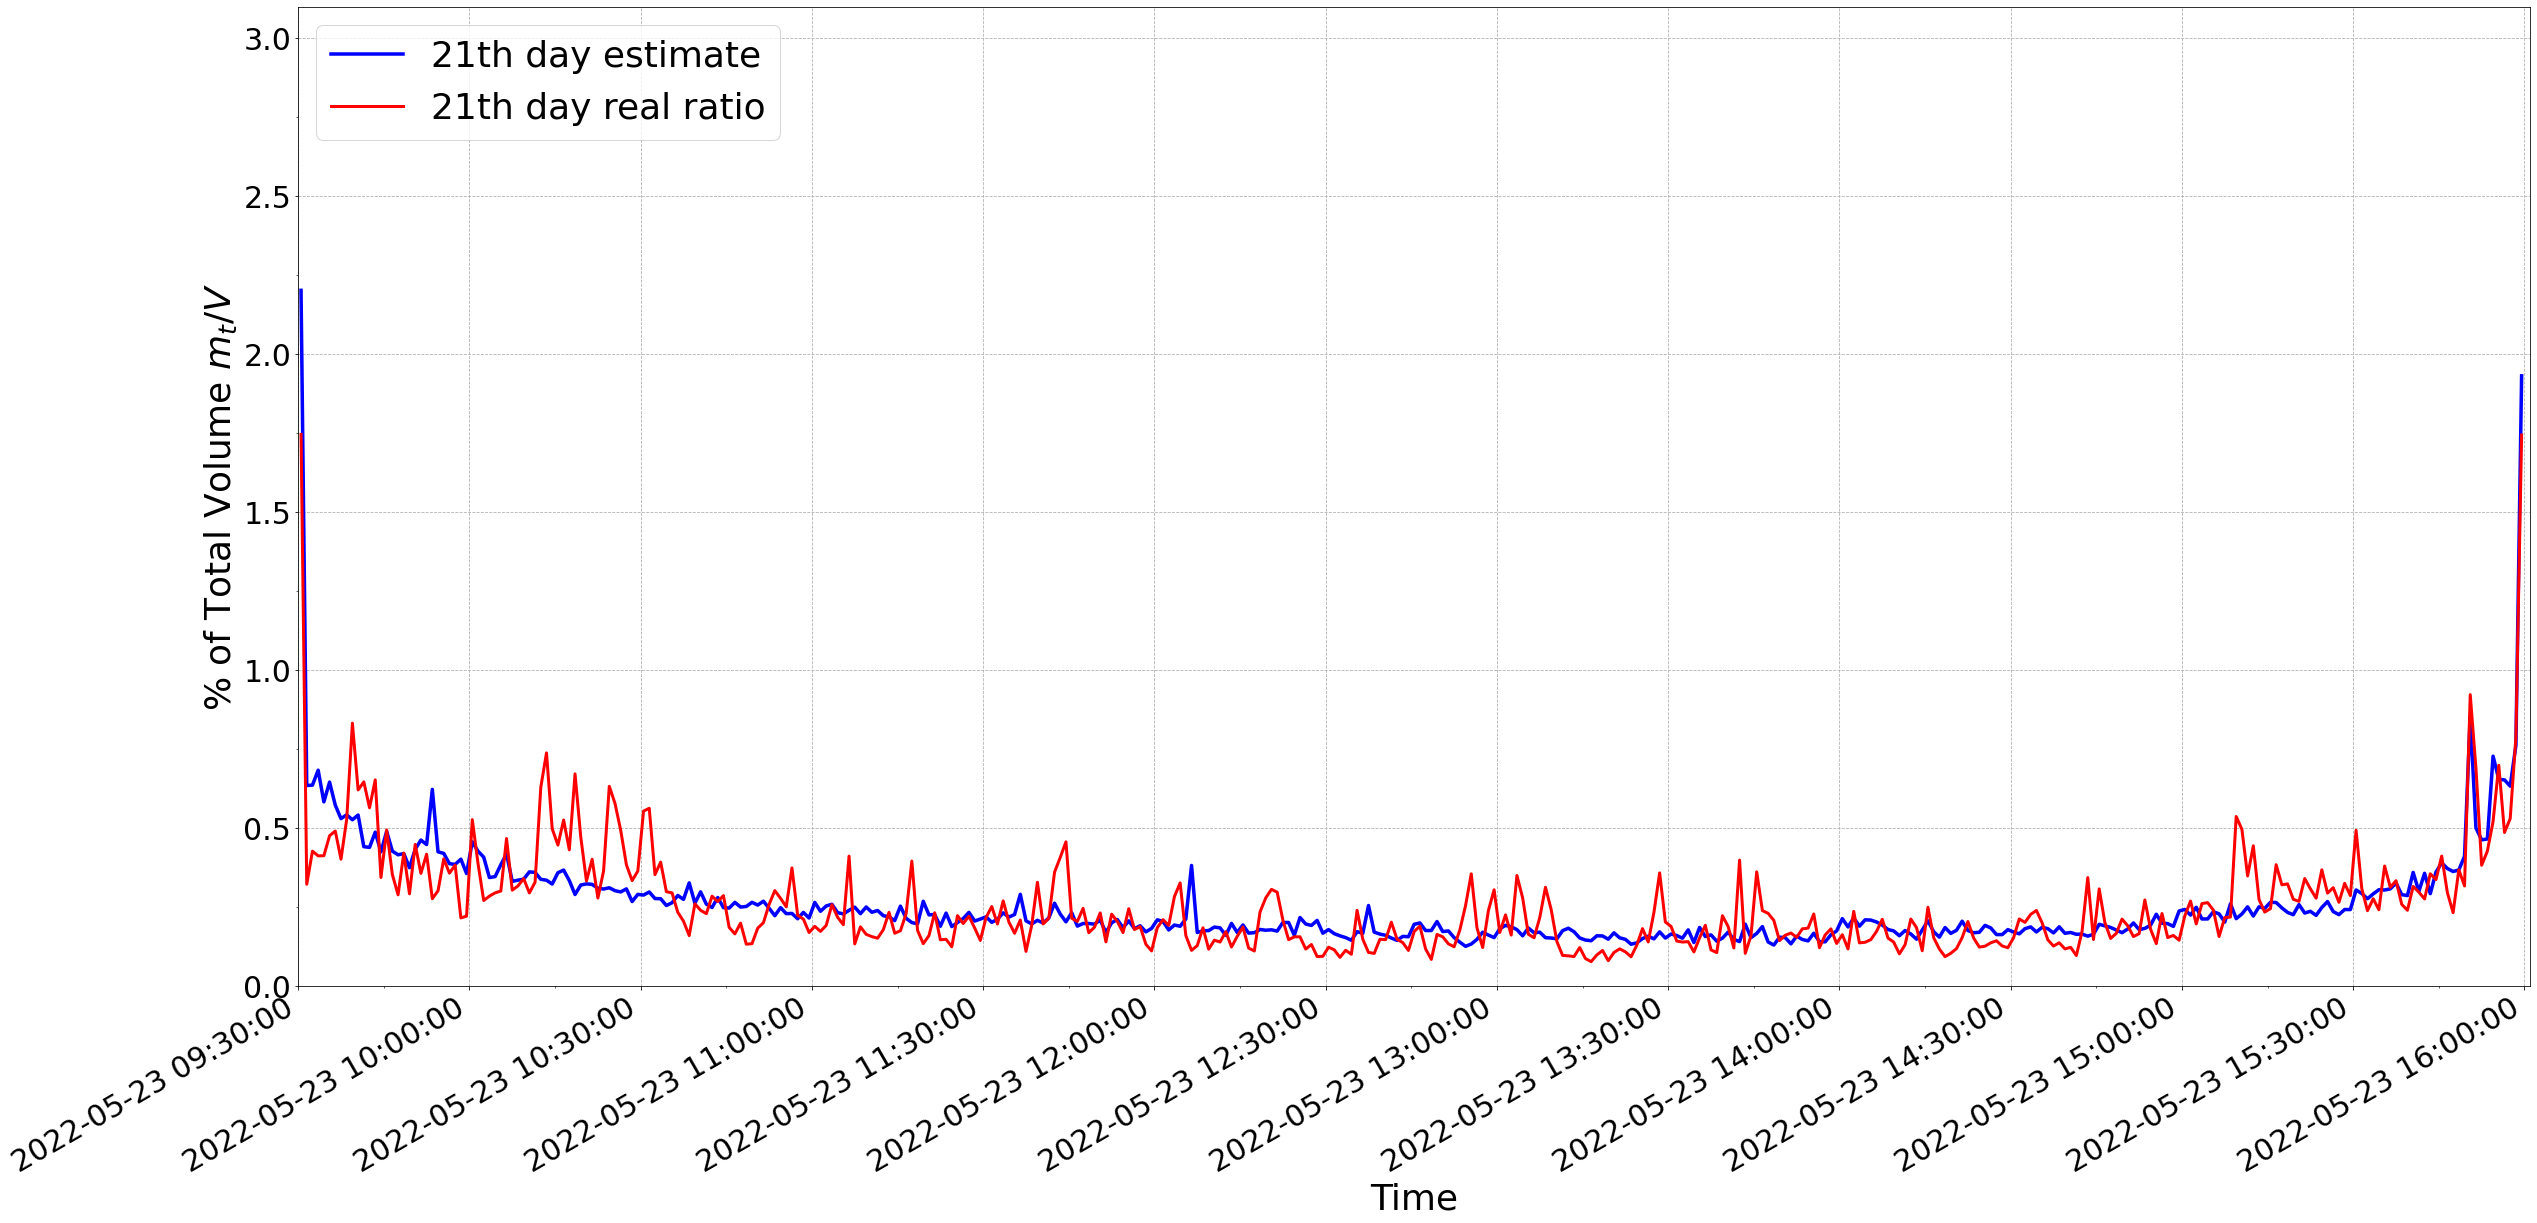

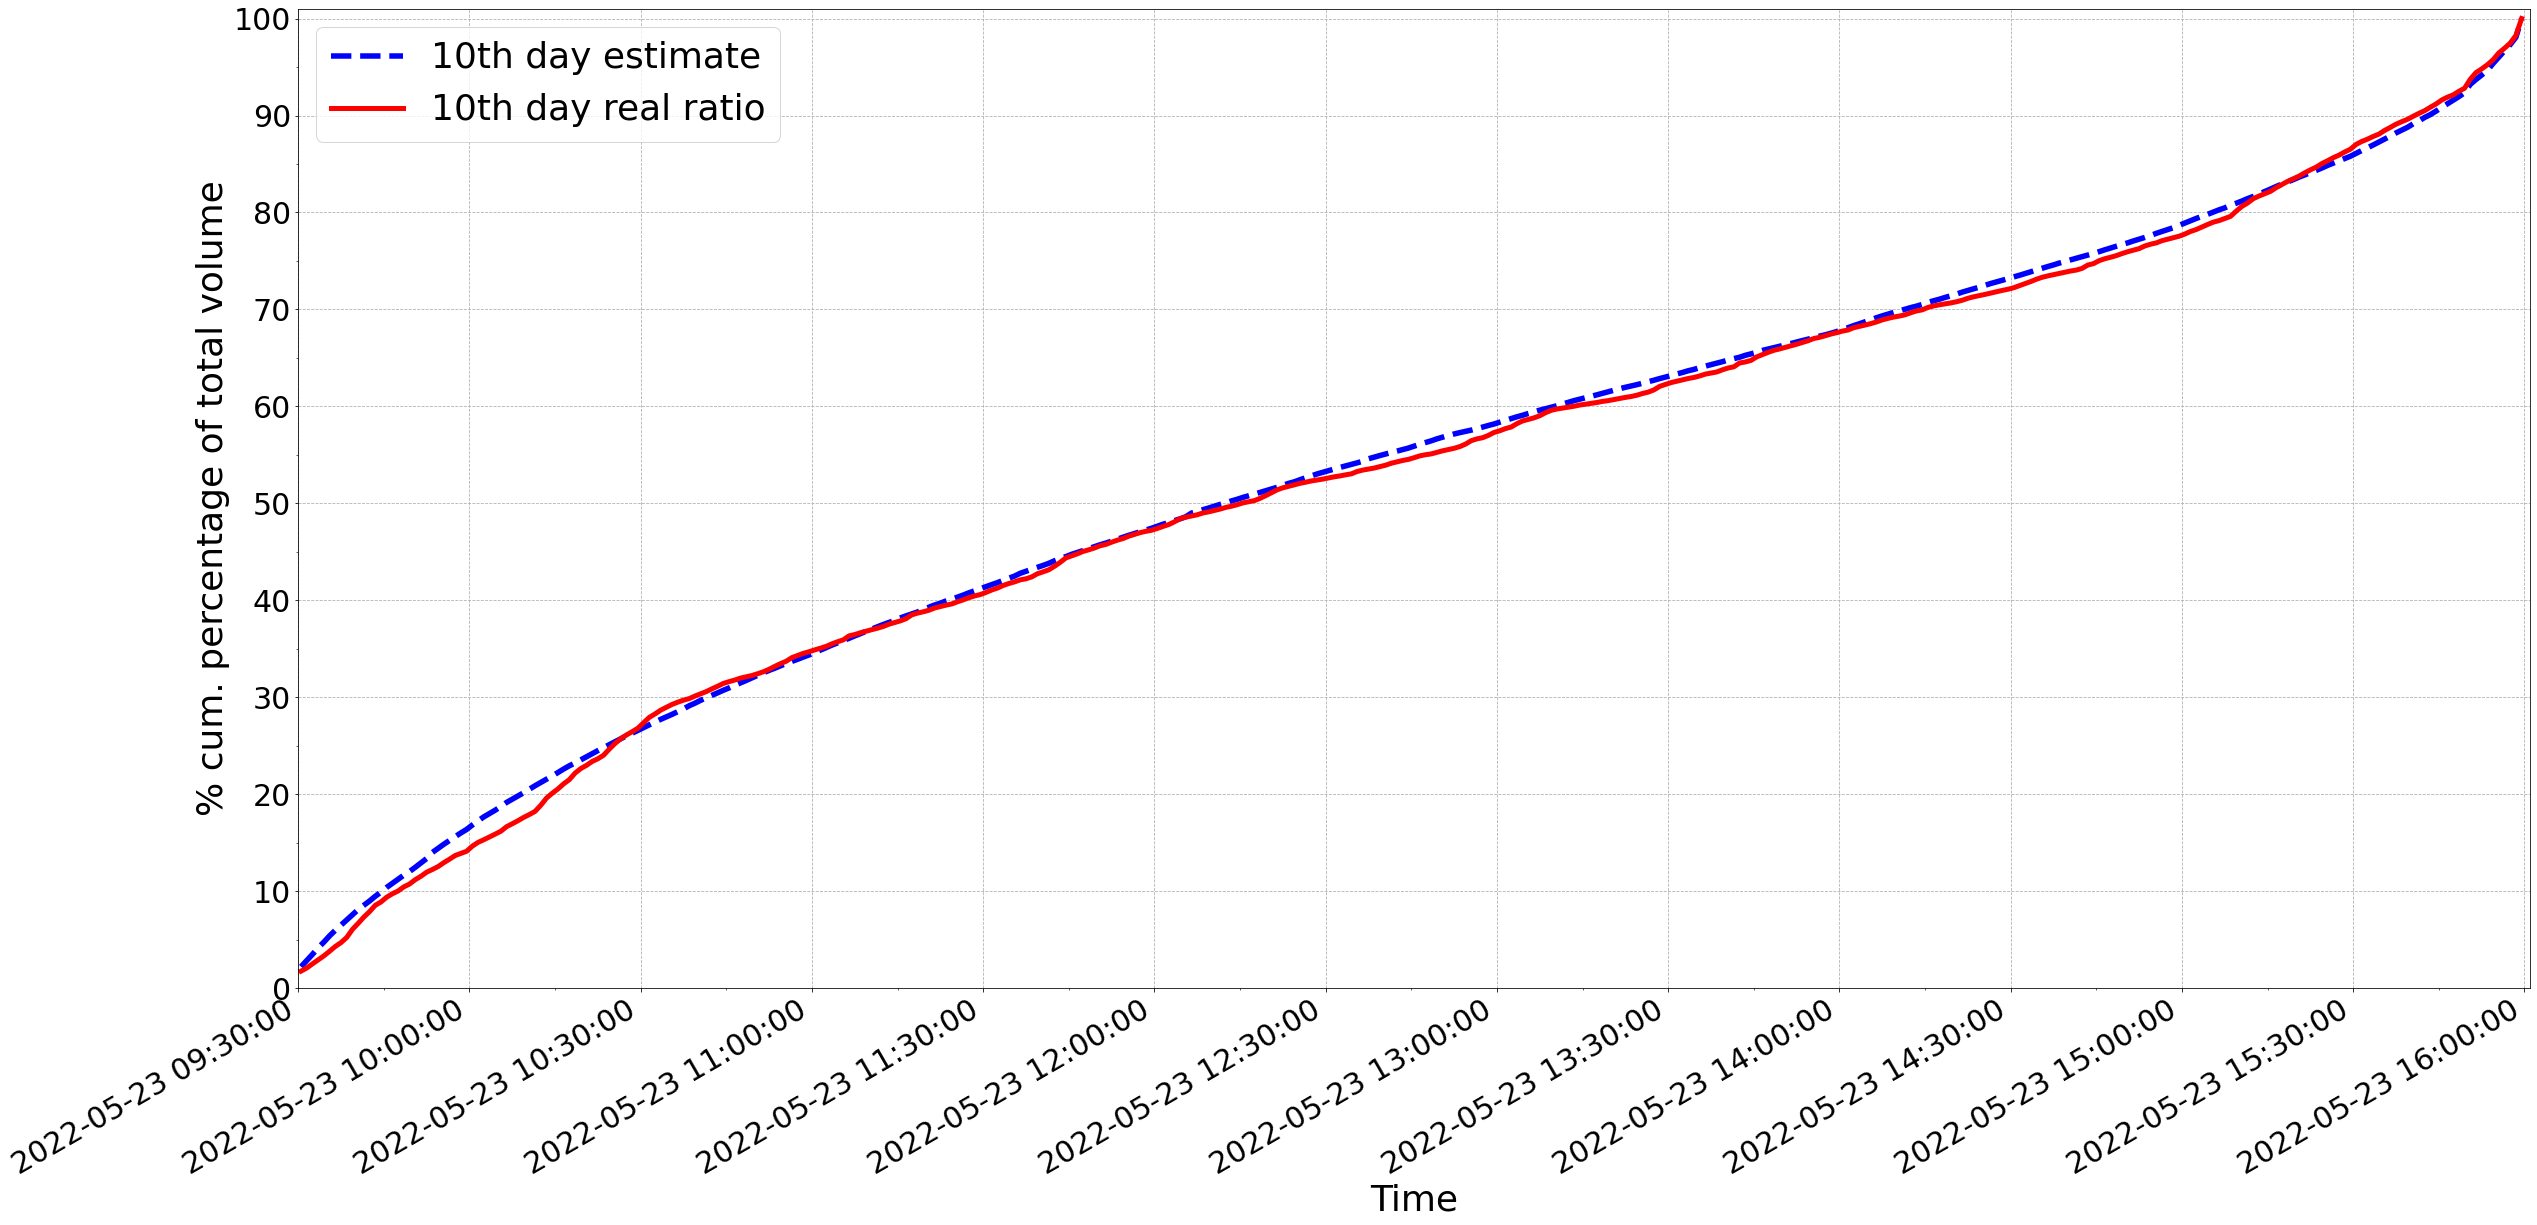

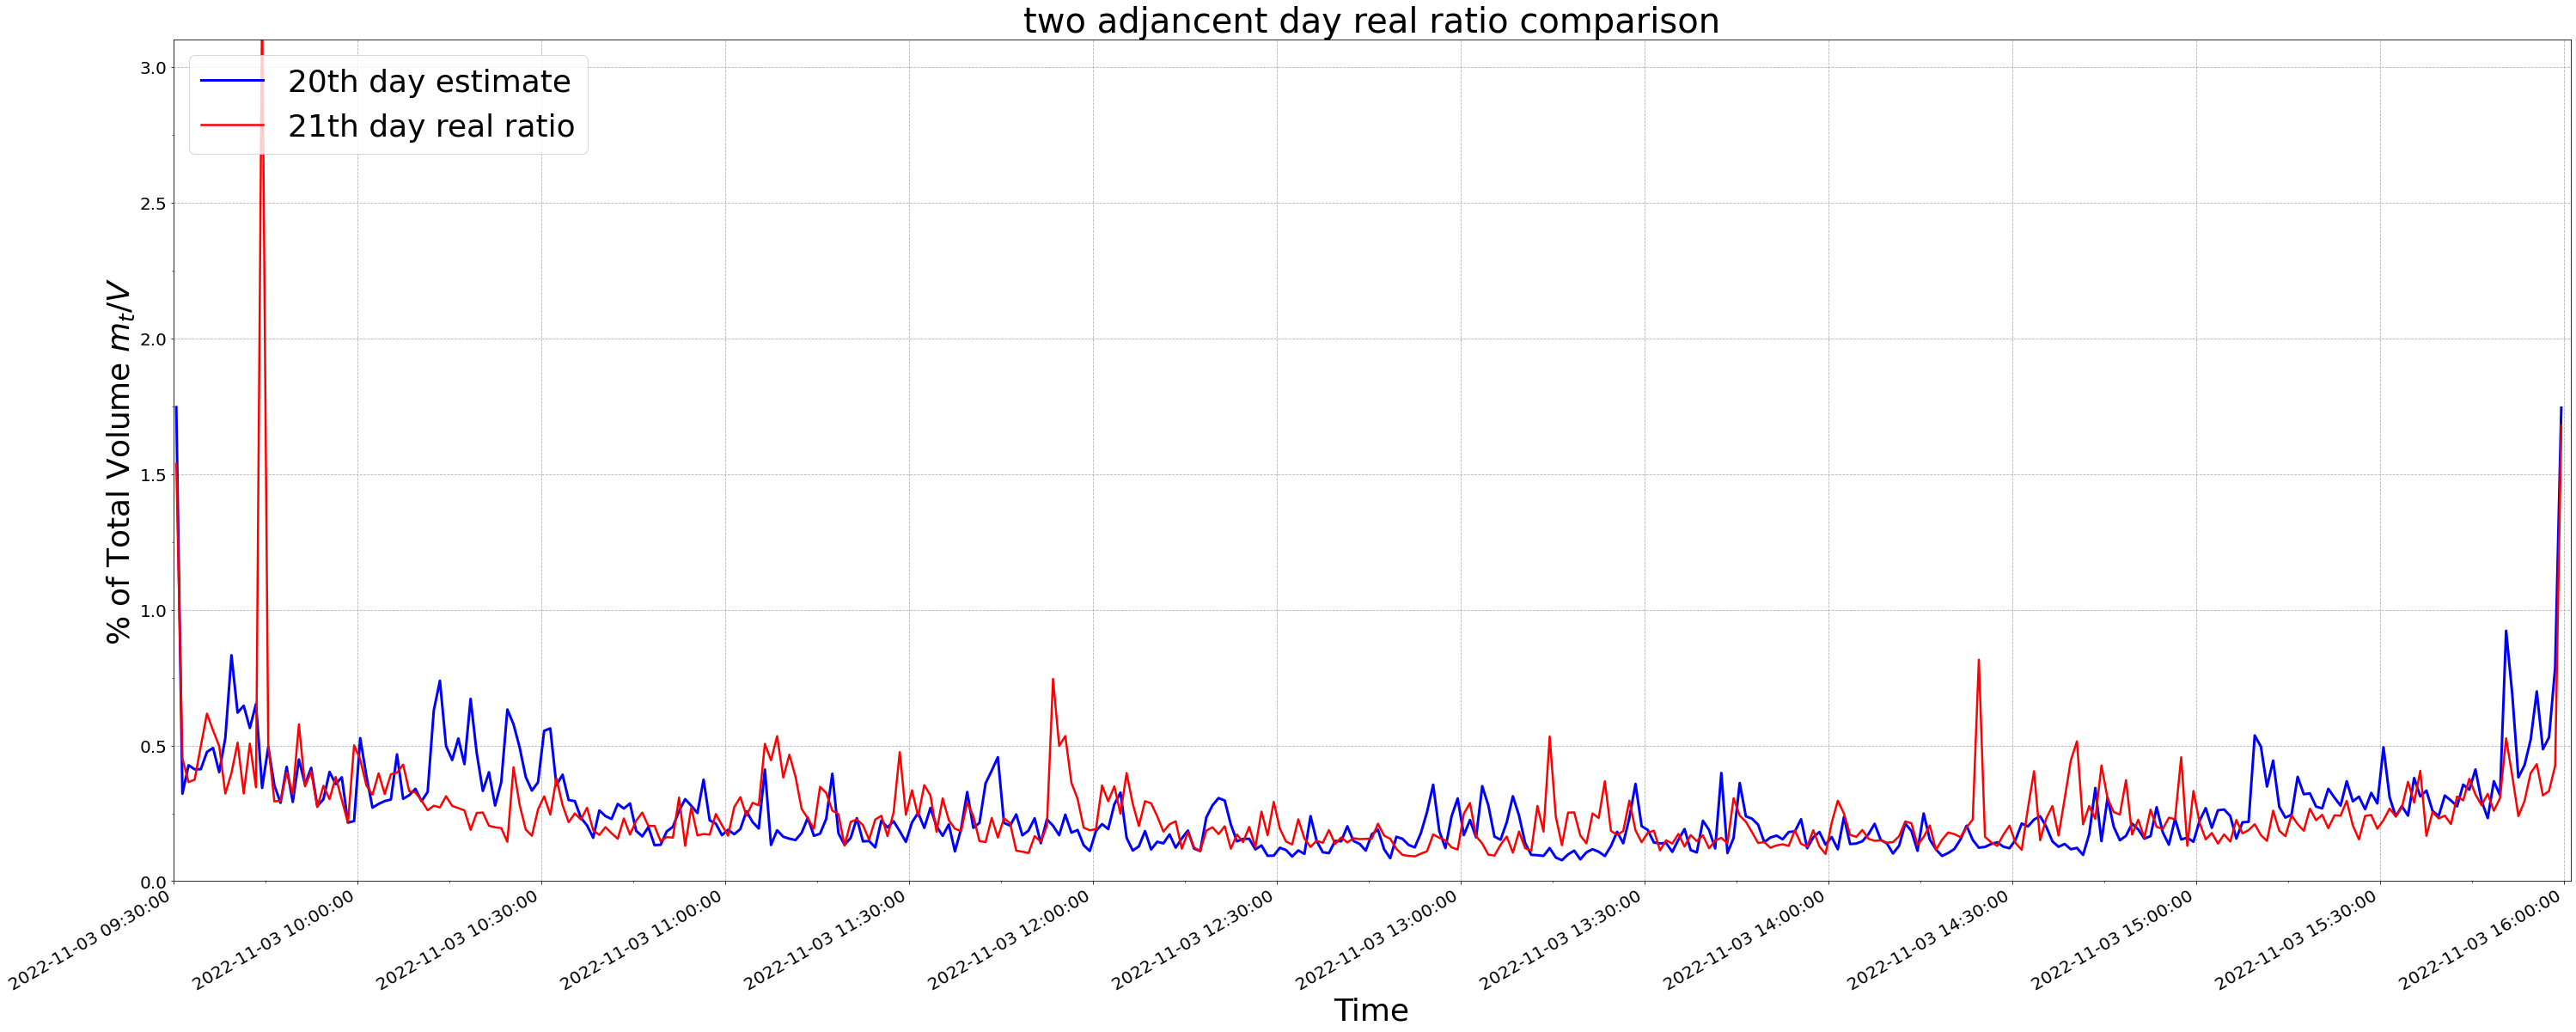

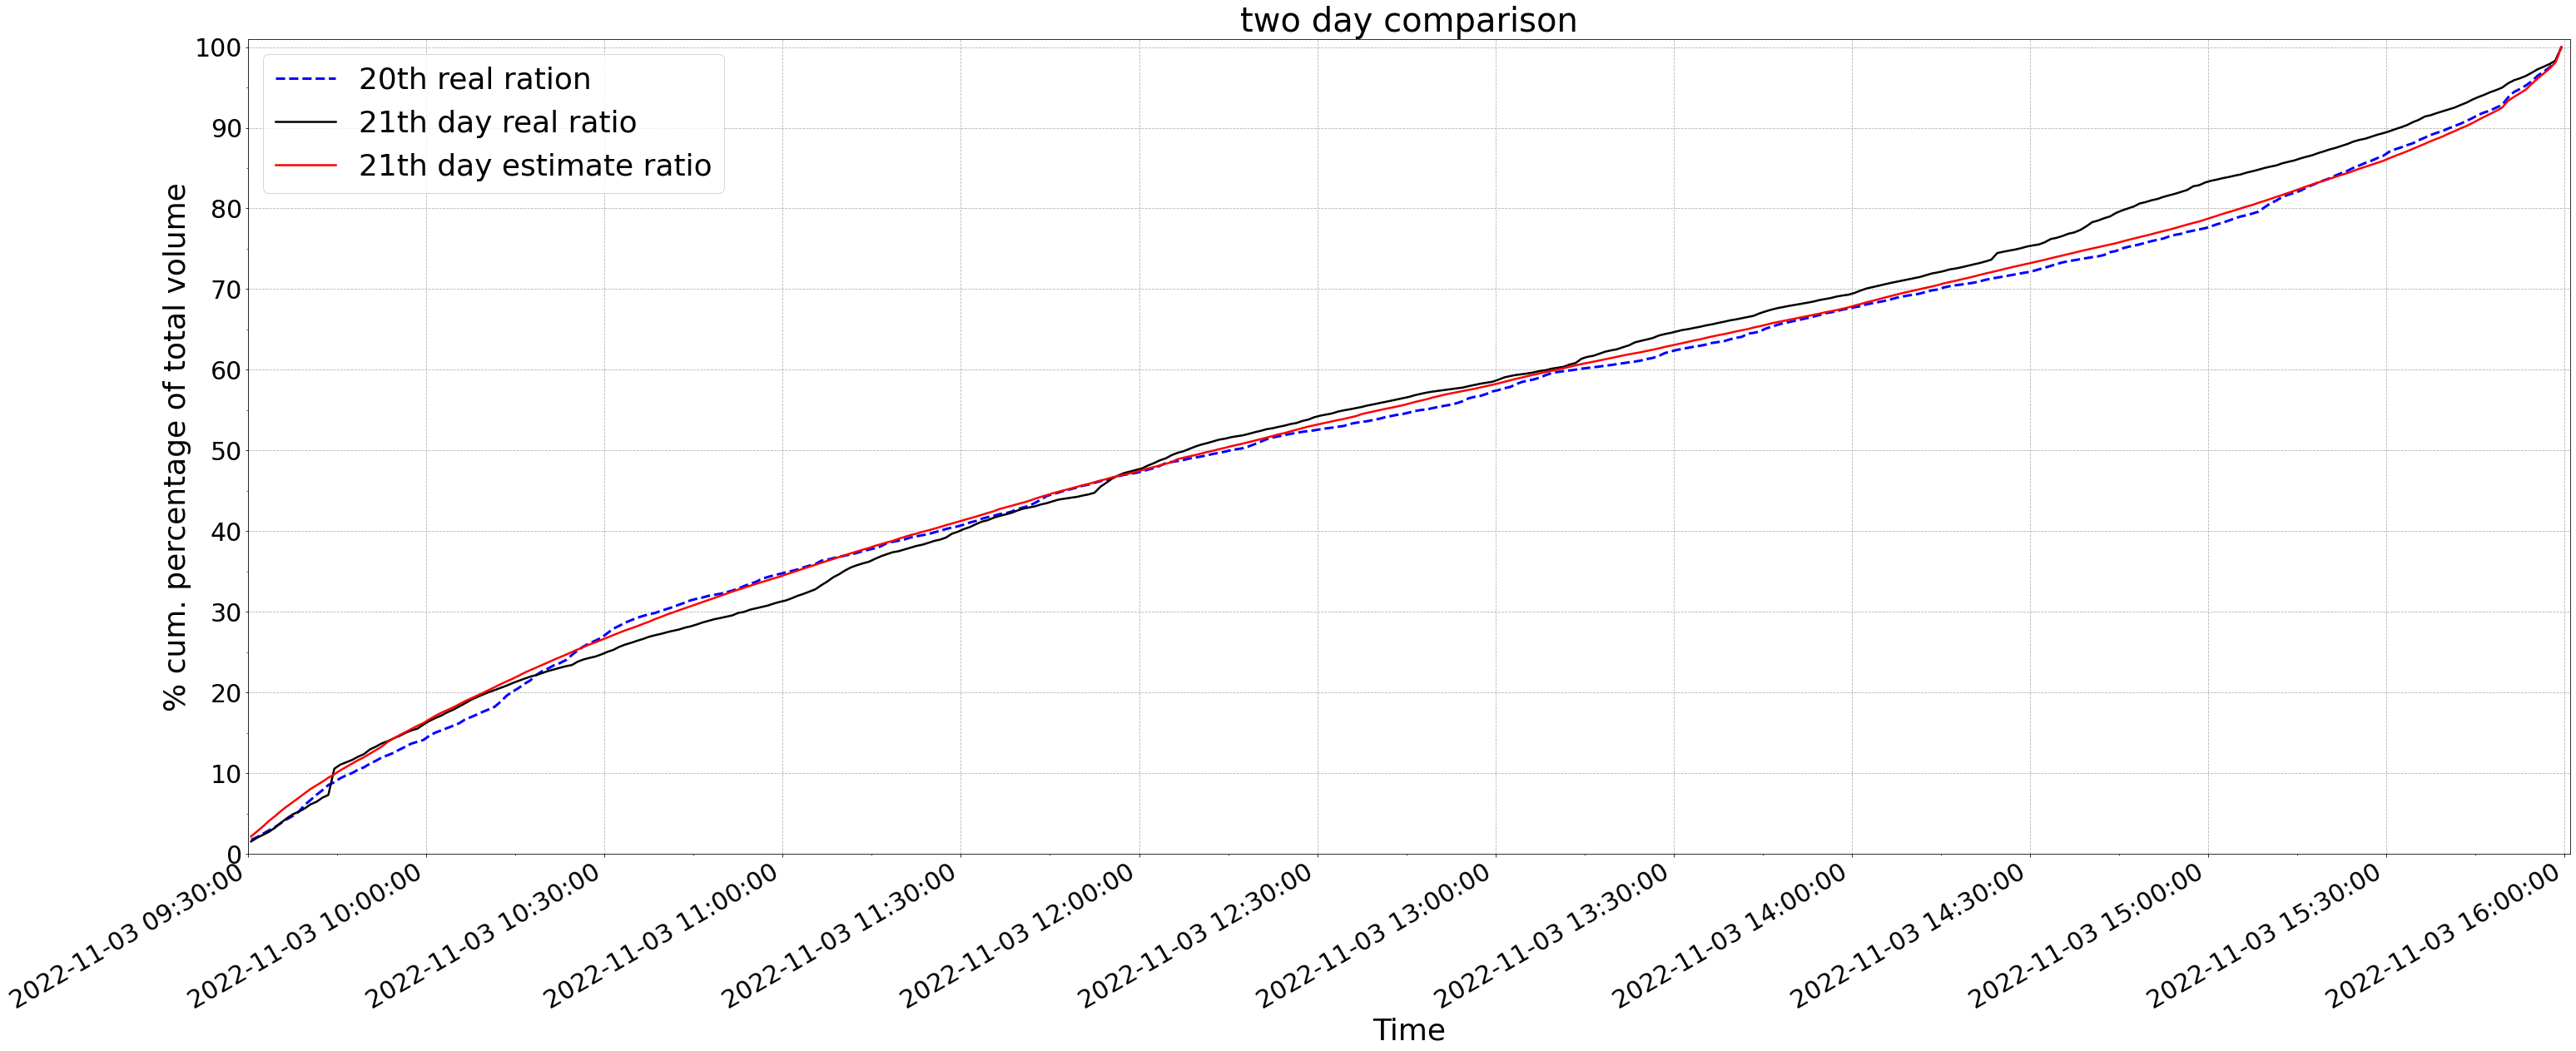

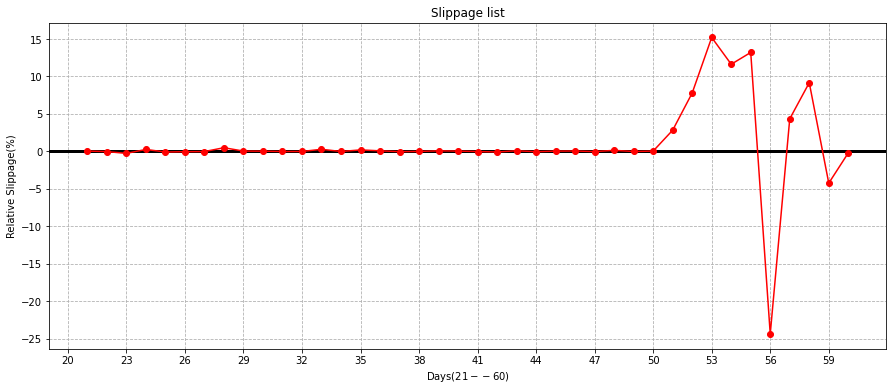

In [125]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from matplotlib.ticker import EngFormatter
# moving average using prior 20 days' data

print("Reading market data")

filePath = "./marketDataTable_2.csv"
table_1 = readData(filePath)
vwap_list = cal_vwap(table_1)    
estVolume = est_dailyVolume(table_1)

# output True 40 days' volume and Estimated 40 days' volume
# print("***VWAP_list: ", vwap_list, "length: ", len(vwap_list[0]))
# print("***True volume: ", estVolume[0])
# print("***estimate volume", estVolume[1])  # please plot it

# # visualize True 40 days' volume with Estimated 40 days' volume
# bs = range(21, 61)
# fig1, ax1 = plt.subplots(figsize = (15, 6))
# formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")
# ax1.yaxis.set_major_formatter(formatter1)
# ax1.set_xlabel('Days($21 -- 60$)')
# ax1.set_ylabel('Volume(V)')
# ylim([30e6, 180e6])

# plot(bs, estVolume[0], 'ko-', label = 'True volume.')
# plot(bs, estVolume[1], 'ro-', label = 'Estimate volume.')

# legend(loc='upper right')
# title('Daily volume $V$ comparison')

n = 0
print("***relative slippage list length: 40 unit: % ", cal_ratio_m(table_1, estVolume[2], n))
# slippage = cal_ratio_m(table_1, estVolume[2], n)




In [126]:
# %pylab inline
# import pandas as pd

# T = 13
# fig3, ax3 = plt.subplots(figsize = (15, 6))
# x_list = list(range(0, T))
# plot(x_list, averageRatio_array_40_by_13[0, :])





# # idx = pd.date_range(start = "09:30", end = "16:00", freq="0.5H")
# # idx = [pd.to_datetime(idx, format = '%Y-%M-%D-%T')]
# # ts = pd.DataFrame(data=np.array(range(0, 14)), index = idx, columns=['data'])
# # ts = pd.Series(range(0, 14), index=idx)
# # print(ts)
# # # ts.plot()
# # fig3, ax3 = plt.subplots(figsize = (15, 6))
# # plot(idx, range(0, 14))
# # ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=1800))
# # gcf().autofmt_xdate()
# # show()


